<a href="https://colab.research.google.com/github/Svendpasak/Capstone-Project-SP/blob/master/ETH1_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Tahap Preprocessing
import keras
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import random as set_random_seed
from sklearn.preprocessing import MinMaxScaler
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
from keras.models import sequential
from keras.layers import Dense,LSTM, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
from tensorflow.python.keras import Sequential
plt.style.use("fivethirtyeight")
#import random as set_random_seed

In [31]:
from google.colab import files
uploaded = files.upload() 

Saving ETH-USD.csv to ETH-USD.csv


In [32]:
df = pd.read_csv("data set ETH-USD.csv", index_col=0)
df.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1069680000


In [33]:
df.shape

(1330, 6)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1330 entries, 2017-11-09 to 2021-06-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1330 non-null   float64
 1   High       1330 non-null   float64
 2   Low        1330 non-null   float64
 3   Close      1330 non-null   float64
 4   Adj Close  1330 non-null   float64
 5   Volume     1330 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 72.7+ KB


In [35]:
# Tahap Data Cleaning (Missing Value)
ETH = df.fillna(0)
ETH.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [36]:
# Pengecekan data Missing Value
ETH.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0, 0.5, 'Close Price')

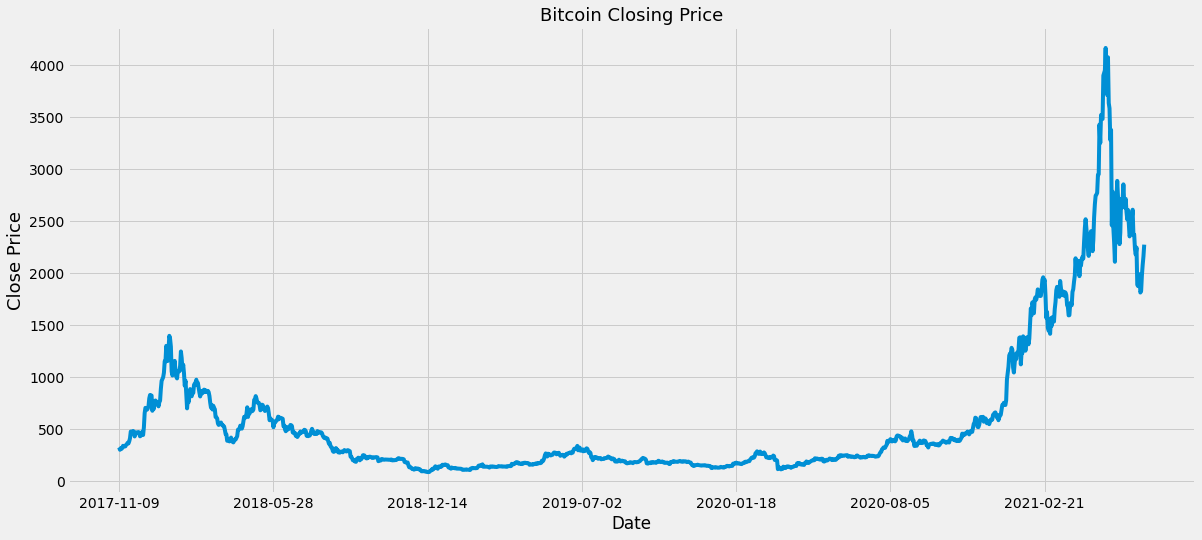

In [37]:
ETH["Close"].plot(figsize=(18,8))
plt.title("Bitcoin Closing Price", fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)

In [38]:
# Create a new dataframe with only the "Close" cloumn
ETH = ETH.filter(["Close"])
# Convert the dataframe to a numpy array
ETH1 = ETH.values
# Get the number of Rows to train the model on
training_data_len = math.ceil(len(ETH1)*.80)
training_data_len

1064

In [39]:
# Scale the Data for Normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(ETH1)
scaled_data

array([[0.05792188],
       [0.05262586],
       [0.05640317],
       ...,
       [0.48853018],
       [0.5083889 ],
       [0.53624599]])

In [40]:
# Create the training data set
# create the scaled training data set
train_data = scaled_data[0: training_data_len, :]
# Split the Data into x_train and y_train data set
x_train = []
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])
    if i <=  31:
        print(x_train)
        print(y_train)
        print()   

[array([0.05792188, 0.05262586, 0.05640317, 0.0547449 , 0.05690141,
       0.06202212, 0.0609757 , 0.06038002, 0.06073992, 0.06446581,
       0.06612432, 0.06914656, 0.067597  , 0.07255514, 0.07978118,
       0.09563299, 0.09351885, 0.09475623, 0.09696587, 0.09514112,
       0.08403078, 0.08882733, 0.09358348, 0.0928267 , 0.09341528,
       0.09448056, 0.09278557, 0.08429153, 0.08571646, 0.09101052])]
[0.09528802194492907]

[array([0.05792188, 0.05262586, 0.05640317, 0.0547449 , 0.05690141,
       0.06202212, 0.0609757 , 0.06038002, 0.06073992, 0.06446581,
       0.06612432, 0.06914656, 0.067597  , 0.07255514, 0.07978118,
       0.09563299, 0.09351885, 0.09475623, 0.09696587, 0.09514112,
       0.08403078, 0.08882733, 0.09358348, 0.0928267 , 0.09341528,
       0.09448056, 0.09278557, 0.08429153, 0.08571646, 0.09101052]), array([0.05262586, 0.05640317, 0.0547449 , 0.05690141, 0.06202212,
       0.0609757 , 0.06038002, 0.06073992, 0.06446581, 0.06612432,
       0.06914656, 0.067597  , 0.

In [41]:
# Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)

In [42]:
# Reshape the Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1034, 30, 1)

In [18]:
# Build the Model
model = keras.Sequential()
model.add(layers.LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(layers.LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(layers.LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(layers.LSTM(50,return_sequences=False))
model.add(Dropout(0.2))
model.add(layers.Dense(1))

In [43]:
# Compile the Model
model.compile(optimizer="adam", loss="mean_squared_error")

In [44]:
# Train the Model
model.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
33/33 [==============================] - 9s 58ms/step - loss: 1.8896e-04
Epoch 2/100
33/33 [==============================] - 2s 58ms/step - loss: 9.5531e-05
Epoch 3/100
33/33 [==============================] - 2s 59ms/step - loss: 1.4818e-04
Epoch 4/100
33/33 [==============================] - 2s 59ms/step - loss: 1.5943e-04
Epoch 5/100
33/33 [==============================] - 2s 61ms/step - loss: 1.4366e-04
Epoch 6/100
33/33 [==============================] - 2s 59ms/step - loss: 1.2954e-04
Epoch 7/100
33/33 [==============================] - 2s 58ms/step - loss: 1.3313e-04
Epoch 8/100
33/33 [==============================] - 2s 58ms/step - loss: 1.5526e-04
Epoch 9/100
33/33 [==============================] - 2s 59ms/step - loss: 1.3448e-04
Epoch 10/100
33/33 [==============================] - 2s 57ms/step - loss: 1.3133e-04
Epoch 11/100
33/33 [==============================] - 2s 59ms/step - loss: 1.3314e-04
Epoch 12/100
33/33 [==============================] - 2s 58ms/s

In [45]:
# Create the testing data set
# Create a new array containing scale values from index .... to the end of data set
test_data = scaled_data[training_data_len-30:,:]

In [46]:
# Created the data set x_test and y_test
x_test = []
y_test = ETH1[training_data_len:,:]#---rest of the data
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [47]:
# Convert the Data to a numpy array
x_test = np.array(x_test)

In [48]:
# Reshape the Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [49]:
# Get the model predicted price values / Denormalize
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [50]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, predictions)*100
print(MAPE)

9.013327856986075


In [51]:
# Plot the Data
train = ETH[:training_data_len]
valid = ETH[training_data_len:]
valid["predictions"] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


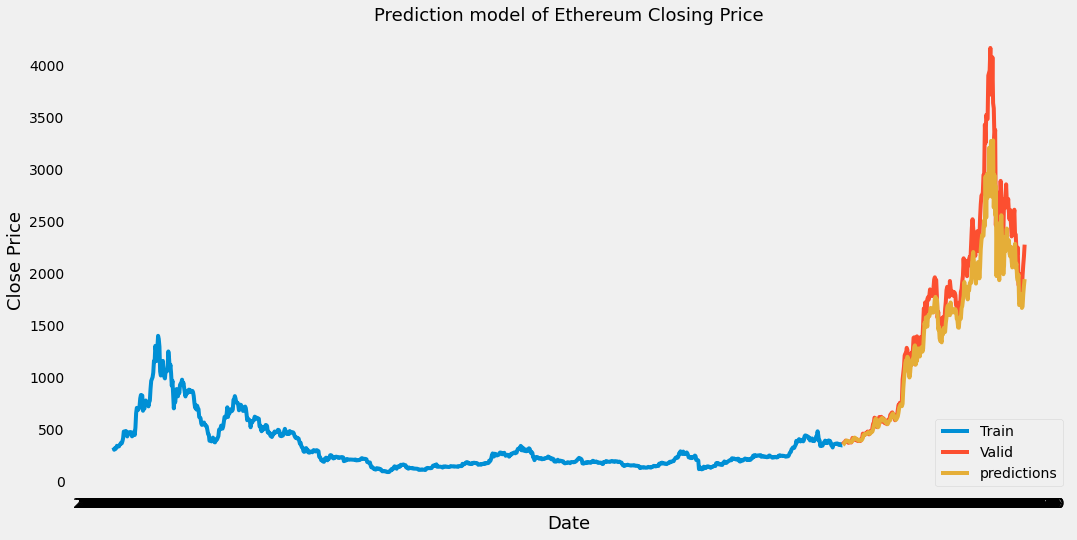

In [52]:
# Visualize the Data
plt.figure(figsize=(16,8))
plt.title("Prediction model of Ethereum Closing Price", fontsize = 18)
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close","predictions"]])
plt.legend(["Train","Valid","predictions"],loc="lower right")
plt.grid()
plt.show()

In [53]:
#Show The Valid and Predicted Prices
valid[["Close" , "predictions"]]

,Close,predictions
Date,,
2020-10-08,350.766144,346.332092
2020-10-09,365.590485,350.951965
2020-10-10,370.967590,362.719940
2020-10-11,375.142059,371.731964
2020-10-12,387.731262,377.839935
...,...,...
2021-06-26,1829.239258,1664.921387
2021-06-27,1978.894653,1678.937866
2021-06-28,2079.657471,1795.862671


In [54]:
valid2 = valid[["Close" , "predictions"]]
valid2.head(20)

,Close,predictions
Date,,
2020-10-08,350.766144,346.332092
2020-10-09,365.590485,350.951965
2020-10-10,370.967590,362.719940
2020-10-11,375.142059,371.731964
2020-10-12,387.731262,377.839935
2020-10-13,381.190765,387.544800
2020-10-14,379.484039,387.459412
2020-10-15,377.441833,385.135773
2020-10-16,366.229004,382.218445


In [55]:
# Get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

177.4553841222245